# DATA PROCESSES ASSIGNMENT

## Understand the business
Clearly define your business and note down the problem you are solving. Do a fundamental analysis on whether providing a data solution will add value to your customer and company or not.

TODO

In this regard,
you must consider univariate and bivariate analysis, survival curves (e.g.,
Kaplan–Meier), and any other analysis that may help to understand the survival
of a patient. You must also train and test different models to predict the
survival (the most important part of the technical execution is the previous
analysis though).



Steps in Data Exploration and Preprocessing:\
Identification of variables and data types\
Analyzing the basic metrics\
Non-Graphical Univariate Analysis\
Graphical Univariate Analysis\
Bivariate Analysis\
Variable transformations\
Missing value treatment\
Outlier treatment\
Correlation Analysis\
Dimensionality Reduction\

TODO
https://towardsai.net/p/data-analysis/exploratory-data-analysis-in-python-ebdf643a33f6

https://mode.com/blog/python-data-visualization-libraries/

## Data exploration
Do you have enough data? — Ask this question if you don’t have data, don’t waste your time and money in making models, evaluating — stop it. Many data science projects are not profitable. Collect data first and build a long-term pipeline of structured data collection. Go for digital transformation, add digital data collection and wait. It is a long-term investment.
Collect your data and guard it with all your might. Self-data collection is a gold mine which only you have it and no one else.

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from IPython.display import display

In [77]:
filepath = "COVID19_data.csv"
col_names = ["id", "age", "sex", "days_hospital", "days_icu", "exitus", "destination", "temp", "heart_rate", "glucose", "sat_o2", "blood_pres_sys", "blood_pres_dias"]
df = pd.read_csv(filepath, header=0, names=col_names).drop("id", axis=1)

#### Identification of variables and data types

In [78]:
print(f"Number of patients: {df.shape[0]}")
print(f"Number of variables to study: {df.shape[1]}")
df.head(10)

Number of patients: 2054
Number of variables to study: 12


,age,sex,days_hospital,days_icu,exitus,destination,temp,heart_rate,glucose,sat_o2,blood_pres_sys,blood_pres_dias
0,15.0,FEMALE,4,0,NO,NaN,37.0,0,0,92,0,0
1,18.0,FEMALE,4,0,NO,ADMISSION,37.3,105,0,97,0,0
2,21.0,MALE,7,0,NO,NaN,38.5,112,0,95,85,47
3,21.0,MALE,10,0,NO,ADMISSION,39.2,113,0,97,0,0
4,22.0,MALE,4,0,NO,NaN,36.3,80,0,92,111,70
5,22.0,MALE,7,0,NO,NaN,37.2,101,0,98,160,84
6,23.0,FEMALE,5,0,NO,NaN,0.0,0,0,0,0,0
7,23.0,FEMALE,4,0,NO,NaN,37.0,99,0,98,0,0
8,24.0,MALE,3,0,NO,NaN,0.0,0,0,0,0,0
9,24.0,MALE,6,0,NO,NaN,36.0,115,0,82,127,68


In [79]:
print(f"Data types in Covid-19 dataset: \n\n{df.dtypes}")

Data types in Covid-19 dataset: 

age                float64
sex                 object
days_hospital        int64
days_icu             int64
exitus              object
destination         object
temp               float64
heart_rate           int64
glucose              int64
sat_o2               int64
blood_pres_sys       int64
blood_pres_dias      int64
dtype: object


#### Analyzing basic metrics

In [80]:
df.describe()

,age,days_hospital,days_icu,temp,heart_rate,glucose,sat_o2,blood_pres_sys,blood_pres_dias
count,2050.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000
mean,70.856585,8.118793,0.355404,28.386319,70.787731,1.776047,73.397760,83.571568,48.328140
std,20.456931,6.177872,2.173721,15.419158,41.802038,20.434622,37.863716,67.450853,44.225438
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.000000,4.000000,0.000000,35.400000,63.000000,0.000000,81.000000,0.000000,0.000000
50%,68.000000,7.000000,0.000000,36.400000,84.000000,0.000000,93.000000,115.000000,64.000000
75%,98.000000,10.000000,0.000000,36.900000,98.000000,0.000000,96.000000,137.000000,79.000000
max,189.000000,98.000000,36.000000,40.100000,593.000000,448.000000,99.000000,772.000000,845.000000


#### Non-graphical univariate analysis
##### Count  values

In [81]:
df["age"].value_counts()

98.0     574
77.0     140
74.0     105
72.0      94
57.0      77
        ... 
15.0       1
106.0      1
105.0      1
18.0       1
102.0      1
Name: age, Length: 62, dtype: int64

In [82]:
df["sex"].value_counts()

MALE      1227
FEMALE     825
Name: sex, dtype: int64

In [83]:
df["days_hospital"].value_counts()

6     218
5     214
7     191
8     171
4     169
3     154
9     125
2     115
11    102
10     86
1      82
12     69
13     61
14     48
15     42
16     34
17     22
0      21
18     17
19     16
21     16
23     12
24     10
20      9
28      8
25      8
22      7
26      5
27      5
36      3
31      3
29      2
33      1
47      1
39      1
51      1
50      1
98      1
32      1
34      1
67      1
Name: days_hospital, dtype: int64

In [84]:
df["days_icu"].value_counts()

0     1947
1       29
2       11
3        7
8        6
5        6
6        6
11       5
9        5
4        5
7        4
10       4
16       3
13       3
24       2
20       2
12       2
36       1
14       1
15       1
19       1
21       1
25       1
27       1
Name: days_icu, dtype: int64

In [85]:
df["exitus"].value_counts()

NO     1684
YES     329
Name: exitus, dtype: int64

In [86]:
df["destination"].value_counts()

ADMISSION    671
Name: destination, dtype: int64

In [87]:
df["temp"].value_counts()

0.000000     467
36.500000    129
36.000000    116
36.600000    108
36.300000     93
36.800000     86
36.400000     80
36.700000     77
36.900000     74
36.200000     72
37.000000     67
36.100000     60
37.200000     50
37.300000     44
37.700000     40
35.900000     34
37.100000     32
37.400000     32
37.500000     27
38.000000     27
38.100000     27
35.800000     24
35.500000     24
37.600000     22
35.700000     22
38.300000     20
37.900000     18
38.500000     18
38.200000     17
37.800000     17
35.600000     16
35.400000     15
35.200000     12
35.300000     11
35.000000     10
38.600000      9
38.400000      8
38.700000      8
35.100000      8
38.900000      7
39.000000      6
38.800000      5
39.100000      3
39.800000      2
33.200000      1
34.100000      1
34.000000      1
40.100000      1
39.500000      1
39.200000      1
37.099998      1
34.600000      1
39.400000      1
34.900000      1
Name: temp, dtype: int64

In [88]:
df["heart_rate"].value_counts()

0      448
85      65
80      55
100     53
84      46
      ... 
140      1
136      1
52       1
48       1
593      1
Name: heart_rate, Length: 101, dtype: int64

In [89]:
df["glucose"].value_counts()

0      2035
80        1
227       1
219       1
171       1
139       1
123       1
111       1
99        1
97        1
93        1
448       1
332       1
272       1
242       1
214       1
184       1
170       1
140       1
287       1
Name: glucose, dtype: int64

In [90]:
df["sat_o2"].value_counts()

0     422
95    235
94    187
96    180
97    135
93    132
92    113
99    106
98    102
91     75
90     74
88     55
89     33
87     32
85     25
84     22
80     15
82     15
86     13
78     13
70      9
81      6
60      6
75      5
83      5
50      4
76      4
55      3
74      3
71      3
73      3
63      2
64      2
79      2
68      2
72      2
40      1
66      1
10      1
44      1
57      1
77      1
53      1
65      1
45      1
Name: sat_o2, dtype: int64

In [91]:
df["blood_pres_sys"].value_counts()

0      750
130     36
140     34
150     32
135     30
      ... 
67       1
71       1
75       1
79       1
199      1
Name: blood_pres_sys, Length: 131, dtype: int64

In [92]:
df["blood_pres_dias"].value_counts()

0      750
70      58
80      54
78      49
79      47
      ... 
114      1
108      1
106      1
42       1
845      1
Name: blood_pres_dias, Length: 82, dtype: int64

##### Unique values

In [93]:
print(df["age"].unique())

[ 15.  18.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.  32.
  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.
  47.  48.  49.  50.  51.  52.  53.  54.  56.  57.  58.  59.  60.  61.
  62.  63.  64.  65.  66.  67.  68.  69.  72.  73.  74.  77.  98.  99.
 100. 101. 102. 105. 106. 189.  nan]


In [94]:
print(df["sex"].unique())

['FEMALE' 'MALE' nan]


In [95]:
print(df["days_hospital"].unique())

[ 4  7 10  5  3  6 14  0 11  1  2 12  8  9 19 21 15 16 18 20 13 23 22 17
 26 25 29 27 24 50 36 34 28 51 47 31 33 39 67 32 98]


In [96]:
print(df["days_icu"].unique())

[ 0  1  4 13 16  8  3  7 20  5  2 12  9 10 11 19 14  6 36 21 24 25 15 27]


In [97]:
print(df["exitus"].unique())

['NO' nan 'YES']


In [98]:
print(df["destination"].unique())

[nan 'ADMISSION']


In [99]:
print(df["temp"].unique())

[37.         37.3        38.5        39.2        36.3        37.2
  0.         36.         37.9        39.5        37.4        35.6
 36.2        35.         38.3        39.8        37.7        36.4
 38.         38.4        36.7        36.8        36.5        36.1
 38.9        35.2        39.4        38.1        36.6        38.7
 37.6        36.9        39.1        39.         37.8        35.8
 38.2        35.7        38.6        38.8        37.5        37.1
 35.9        35.5        40.1        35.3        35.1        34.
 35.4        34.1        37.09999847 33.2        34.6        34.9       ]


In [100]:
print(df["heart_rate"].unique())

[  0 105 112 113  80 101  99 115  84 131  98 104  74  68 107  56 110  90
  76 118 120  78  92 106  89  95  93  70 100 119  52  97  77 123 137 135
 125 109 116  85  75  88  96  66  86 117  82  83 127  79 128 102  94 126
  71  60 129 114 111  91 108 593  87  81 130 103  62  42  64  63 145  65
  73 124  57  53 136 143  72 122  67 132 133  58  69 121  61  59 140  21
 150  54 156 167  55 170  41  48  47  51 190]


In [101]:
print(df["glucose"].unique())

[  0 139 171  97  93 448 272  99 227 123 242 111 287 332 219 214 184 140
 170  80]


In [102]:
print(df["sat_o2"].unique())

[92 97 95 98  0 82 99 96 93 91 94 80 90 88 89 79 87 86 10 78 85 70 83 84
 45 50 76 64 40 75 74 66 72 81 63 60 44 68 71 55 77 73 53 65 57]


In [103]:
print(df["blood_pres_sys"].unique())

[  0  85 111 160 127 118 150 139 142 107 115 100 772 125 122 121 126 134
 133 104 119 132 140 172 113 130 136  26 110 106 145  88 117 137 102 129
 141 101 124 144 157 109 135 128 146 138 148 116 120 143 123 166 108  70
 153 112 131  99 114  80 105 164  81 151 149  90 156 165  97  94 154 169
 170 147 155  75 103 180 159 191  91  60 152  98 175 174 163 162 158 161
  19  96 173  95  93 177 168  12 186  76 184  13 176  92 179 181 198 167
 171  87 192  89 183  86  53  79 200  63 190  67 195 182 185 193  83  71
 196  10  62 199  20]


In [104]:
print(df["blood_pres_dias"].unique())

[  0  47  70  84  68  72  85  82  76  37  54  74  90  60  65  77  79  98
 110  75  83  62  81  69  73  66  59  53  49  89  57  86  88  67  96  63
  64  92  78  87  71  95 109  80 741  40  93  52  91 100  97  39  58  55
  48 108  46 101 107 104 102  94  51 105  56  99  44 114  61  43  50 106
 103  41  32  31  42  11 127 120 845  45]


##### Null values in the dataset

In [105]:
df.apply(lambda x: sum(x.isnull()))

age                   4
sex                   2
days_hospital         0
days_icu              0
exitus               41
destination        1383
temp                  0
heart_rate            0
glucose               0
sat_o2                0
blood_pres_sys        0
blood_pres_dias       0
dtype: int64

##### Data type conversion 

In [106]:
df["sex"] = df["sex"].astype("string")
df["exitus"] = df["exitus"].astype("string")
df["destination"] = df["destination"].astype("string")

##### Histograms

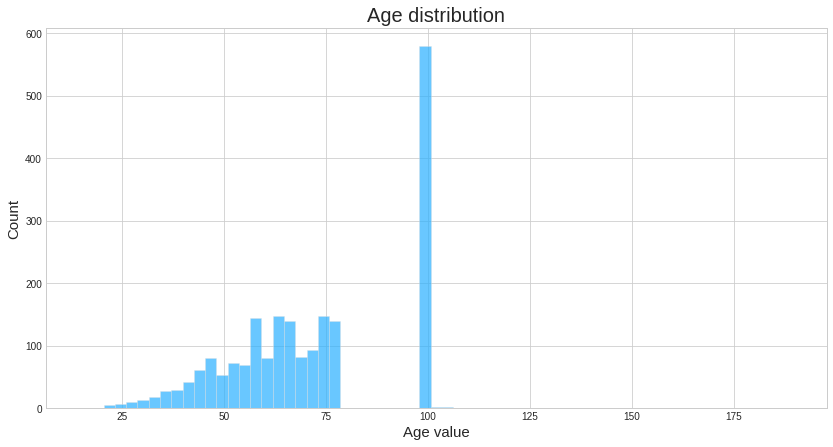

In [194]:
plt.figure(figsize=(14,7))
plt.style.use('seaborn-whitegrid')
plt.hist(df["age"], bins=len(df["age"].unique()), facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)
plt.title('Age distribution', fontsize=20) 
plt.xlabel('Age value', fontsize=15) 
plt.ylabel('Count', fontsize=15) 
plt.show()

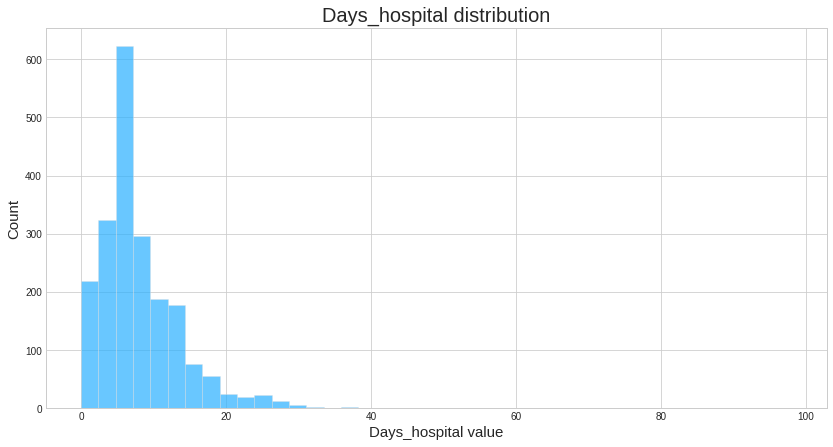

In [195]:
plt.figure(figsize=(14,7))
plt.style.use('seaborn-whitegrid')
plt.hist(df["days_hospital"], bins=len(df["days_hospital"].unique()), facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)
plt.title('Days_hospital distribution', fontsize=20) 
plt.xlabel('Days_hospital value', fontsize=15) 
plt.ylabel('Count', fontsize=15) 
plt.show()

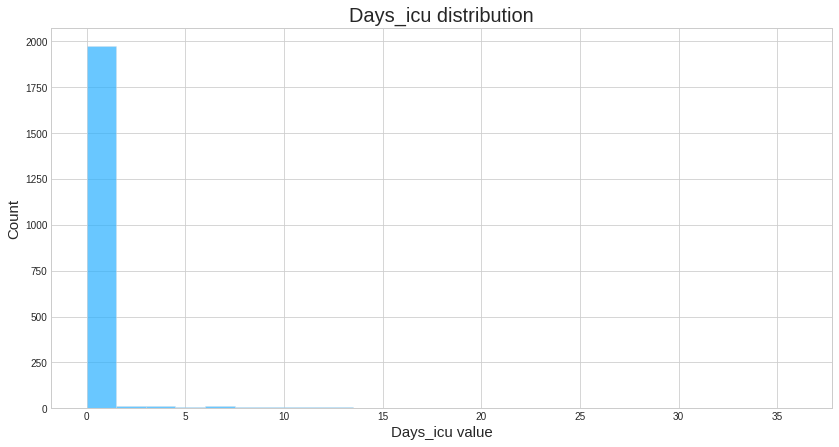

In [196]:
plt.figure(figsize=(14,7))
plt.style.use('seaborn-whitegrid')
plt.hist(df["days_icu"], bins=len(df["days_icu"].unique()), facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)
plt.title('Days_icu distribution', fontsize=20) 
plt.xlabel('Days_icu value', fontsize=15) 
plt.ylabel('Count', fontsize=15) 
plt.show()

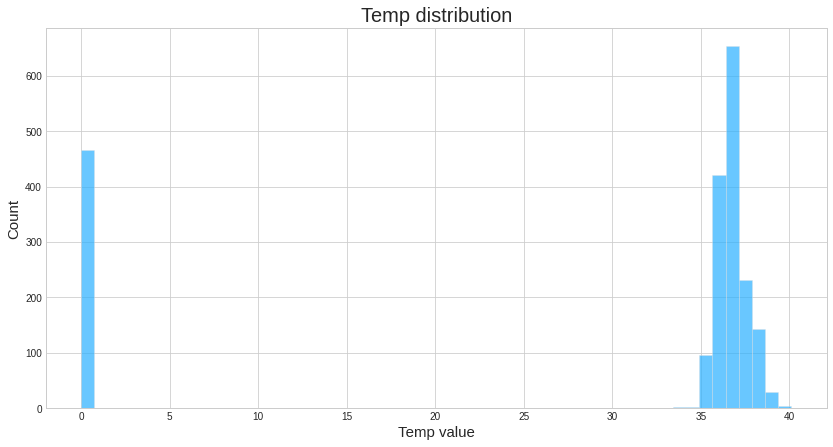

In [197]:
plt.figure(figsize=(14,7))
plt.style.use('seaborn-whitegrid')
plt.hist(df["temp"], bins=len(df["temp"].unique()), facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)
plt.title('Temp distribution', fontsize=20) 
plt.xlabel('Temp value', fontsize=15) 
plt.ylabel('Count', fontsize=15) 
plt.show()

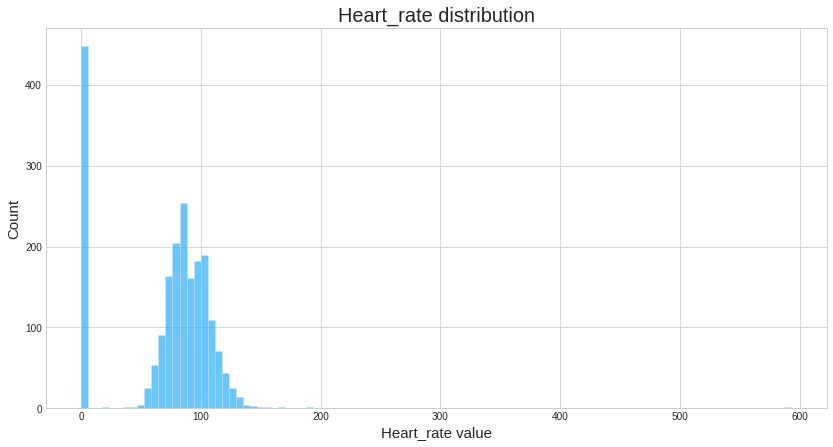

In [198]:
plt.figure(figsize=(14,7))
plt.style.use('seaborn-whitegrid')
plt.hist(df["heart_rate"], bins=len(df["heart_rate"].unique()), facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)
plt.title('Heart_rate distribution', fontsize=20) 
plt.xlabel('Heart_rate value', fontsize=15) 
plt.ylabel('Count', fontsize=15) 
plt.show()

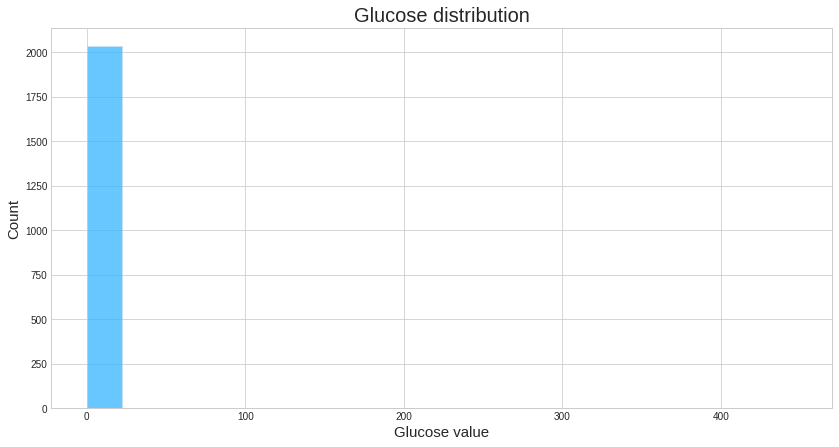

In [199]:
plt.figure(figsize=(14,7))
plt.style.use('seaborn-whitegrid')
plt.hist(df["glucose"], bins=len(df["glucose"].unique()), facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)
plt.title('Glucose distribution', fontsize=20) 
plt.xlabel('Glucose value', fontsize=15) 
plt.ylabel('Count', fontsize=15) 
plt.show()

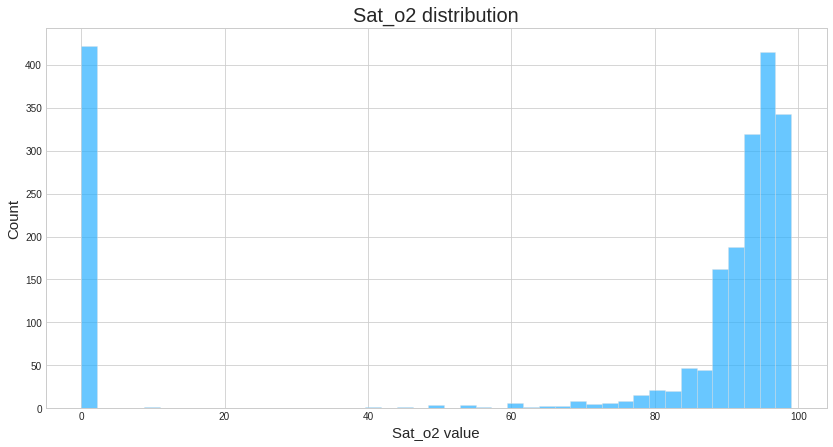

In [200]:
plt.figure(figsize=(14,7))
plt.style.use('seaborn-whitegrid')
plt.hist(df["sat_o2"], bins=len(df["sat_o2"].unique()), facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)
plt.title('Sat_o2 distribution', fontsize=20) 
plt.xlabel('Sat_o2 value', fontsize=15) 
plt.ylabel('Count', fontsize=15) 
plt.show()

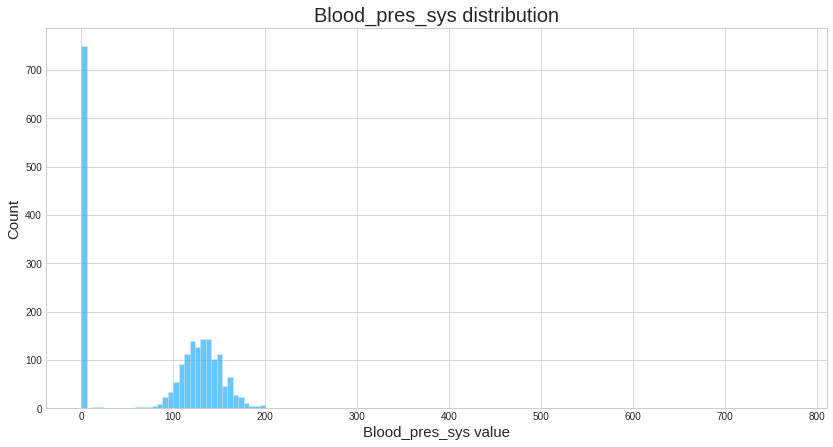

In [201]:
plt.figure(figsize=(14,7))
plt.style.use('seaborn-whitegrid')
plt.hist(df["blood_pres_sys"], bins=len(df["blood_pres_sys"].unique()), facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)
plt.title('Blood_pres_sys distribution', fontsize=20) 
plt.xlabel('Blood_pres_sys value', fontsize=15) 
plt.ylabel('Count', fontsize=15) 
plt.show()

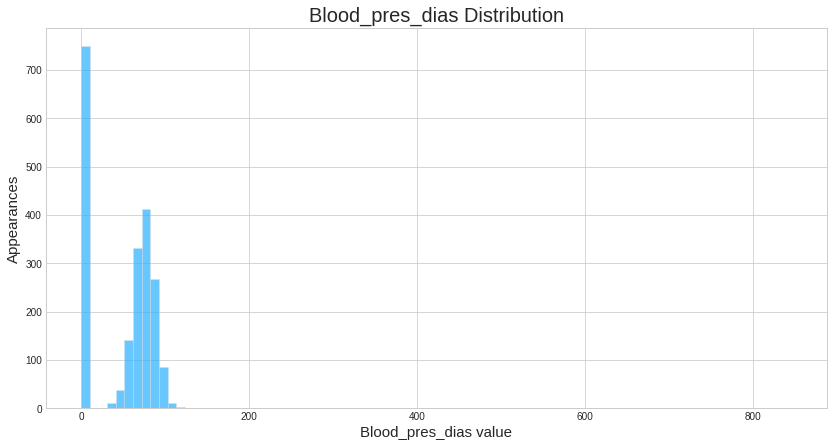

In [155]:
plt.figure(figsize=(14,7))
plt.style.use('seaborn-whitegrid')
plt.hist(df["blood_pres_dias"], bins=len(df["blood_pres_dias"].unique()), facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)
plt.title('Blood_pres_dias distribution', fontsize=20) 
plt.xlabel('Blood_pres_dias value', fontsize=15) 
plt.ylabel('Count', fontsize=15) 
plt.show()

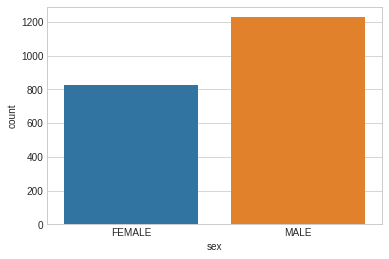

In [168]:
sns.countplot(df["sex"])
plt.show()

/home/rafael/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


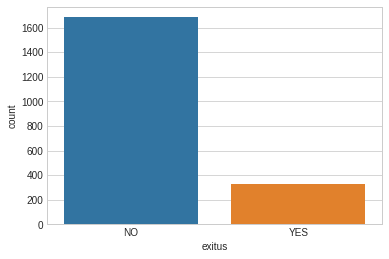

In [164]:
sns.countplot(df["exitus"])
plt.show()

/home/rafael/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


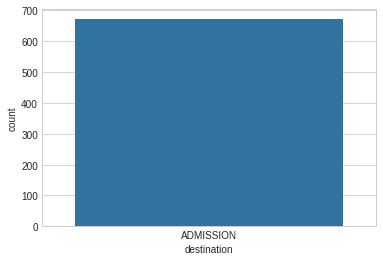

In [165]:
sns.countplot(df["destination"])
plt.show()

##### Box-plot

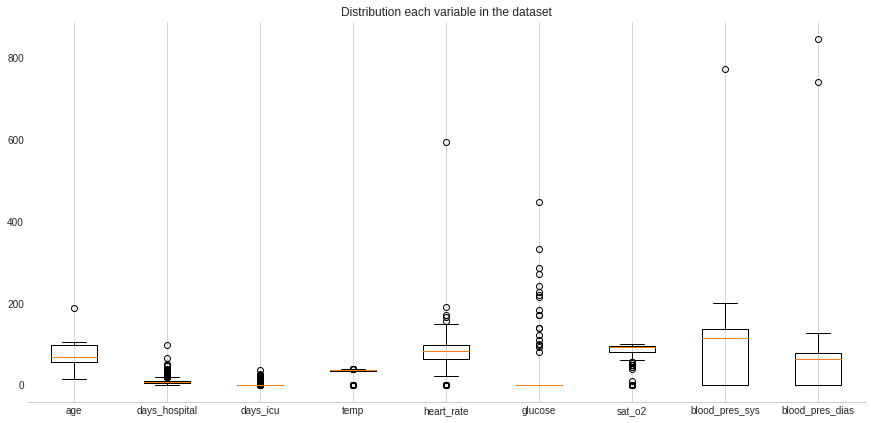

In [217]:
fig, ax = plt.subplots(figsize=(15, 7))

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# Set plot title
ax.set_title('Distribution each variable in the dataset')
# Set species names as labels for the boxplot
# dataset = [setosa_petal_length, versicolor_petal_length, virginica_petal_length]

dataset = [df["age"].dropna(), df["days_hospital"], df["days_icu"], df["temp"], df["heart_rate"], df["glucose"], df["sat_o2"], df["blood_pres_sys"], df["blood_pres_dias"]]
labels = ["age", "days_hospital", "days_icu", "temp", "heart_rate", "glucose", "sat_o2", "blood_pres_sys", "blood_pres_dias"]
ax.boxplot(dataset, labels=labels)
plt.show()


## Data preparation
Now you have your data, prepare it, clean it, store it properly, update it, and arrange it in a meaningful way when it is ready.

## Data problem research
Define your data problem and see if there are readily available solutions to it by service providers like Google Cloud, AWS or Azure, or any other API services. Try not to reinvent the wheel by building some generic models like recommender systems, OCRs, etc. These are now available in the plug-and-play fashion and are very cheap, cheaper than the time, energy, money, and computation power you will spend developing a half-accurate model.

## Predictive model and data transformation
Now quickly come up with simple models. Note that all solutions need not require machine learning or deep learning. Rule-based models work just as fine, sometimes even better. Transform your data based on a model that you have selected. In the first iteration, try all the simple models and decide on a benchmark.

## Testing validation
Define an evaluation metric based on your business problem and test your simple model in this metric. This metric will be your benchmark as we advance.

## Model evaluation
Based on your Validation, rework your model from step 6 and recalculate the evaluation metric to see if you can do better than the benchmark. It may happen that a simple model will solve your problem, but this is rare.
One more insight that you will get from steps 5 and 6 is your data is sufficient or not. You may have to spend some more time on steps 2 and 3 then.

## Solution deployment
Now that you are happy with the evaluation and this model solves your problem deploy the model based on your use case. The best way to consume your model is to build an API around it and integrate that into the solution.
If possible, deploy your model using Docker. Dockerization will help in easy deployment. Making an API around your model will help you upgrade without downtime.
Deployment is one thing that is primarily dependent on how you want to consume the model.

## Optimization
Optimization is the last step and perhaps most crucial step as well, as, and when you collect more data, you should upgrade your model and see if it is appropriately solving your purpose. Did it solve the business problem of step 1? If not! Start over.
